# Downsampling and Upsampling
This notebook aims to help gain a better understanding of downsampling and upsampling by defining different downsampling and upsampling functions and observing how they affect and change the original array

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

### Import Image

In [2]:
image = Image.open('test_image.png')

### Define 4 by 4 Array (Downsampling) 
Define a 4 by 4 array, which will be used as the input for all downsampling functions

In [5]:
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])

### Define Subsampling Function
Define a subsampling function, which is a type of downsampling function that takes the top-left pixel of each 2 by 2 patch

In [6]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  kernel_height = 2
  kernel_width = 2
  height = int(np.ceil(x_in.shape[0]/2))
  width =  int(np.ceil(x_in.shape[1]/2))
  for h in range(height): 
    for w in range(width):
        h_start = h * kernel_height
        h_end   = min(h_start + kernel_height, x_in.shape[0])
        w_start = w * kernel_width
        w_end   = min(w_start + kernel_width, x_in.shape[1])
        patch = x_in[h_start:h_end, w_start:w_end]
        x_out[h, w] = patch[0, 0]

  return x_out

### Convert Image to Numpy Array

In [7]:
data = asarray(image)
data_subsample = subsample(data)

### Print Original Array (4 by 4)

In [8]:
print("Original:")
print(orig_4_4)

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


### Print Subsampled Array (2 by 2)
Print the original array after it has undergone the subsampling function, which returns a 2 by 2 array.

In [9]:
print("Subsampled:")
print(subsample(orig_4_4))

Subsampled:
[[1. 5.]
 [4. 1.]]


### Draw Original Image

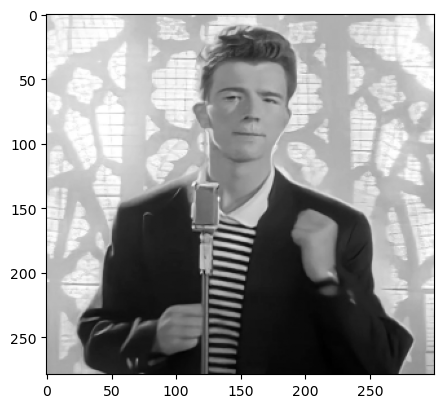

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

### Draw Subsampled Image 

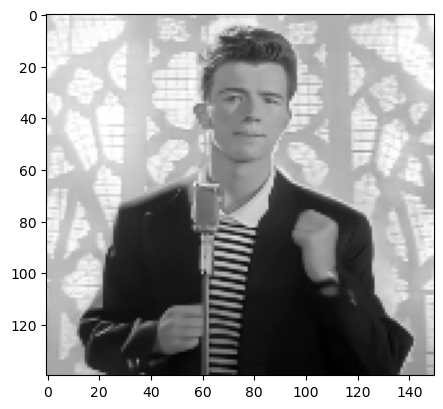

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

### Draw Subsampled (x2) Image
Draw the subsampled image of the subsampled image.

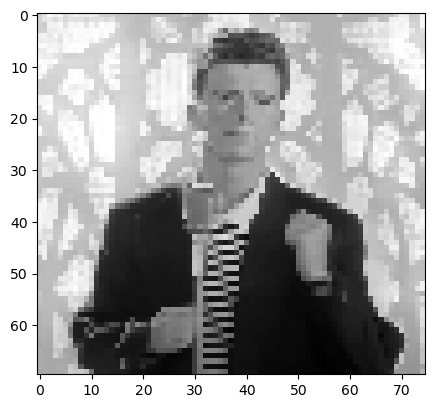

In [12]:
data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

### Draw Subsampled (x3) Image
Draw the subsampled image of the subsampled image of the subsampled image.

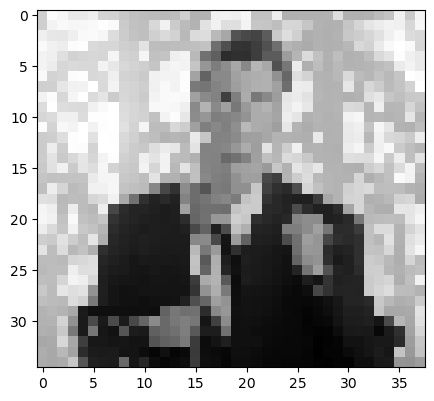

In [13]:
data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

### Define Maxpooling Function
Define the maxpooling function, which is a type of downsampling function that keeps the maximum value of each 2 by 2 patch

In [14]:
def maxpool(x_in):
  kernel_height = 2
  kernel_width = 2
  height = int(np.ceil(x_in.shape[0]/2))
  width =  int(np.ceil(x_in.shape[1]/2))
  x_out = np.zeros((height, width))
  for h in range(height): 
    for w in range(width):
        h_start = h * kernel_height
        h_end   = min(h_start + kernel_height, x_in.shape[0])
        w_start = w * kernel_width
        w_end   = min(w_start + kernel_width, x_in.shape[1])
        patch = x_in[h_start:h_end, w_start:w_end]
        x_out[h, w] = np.max(patch)

  return x_out

### Print Original Array (4 by 4)

In [15]:
print("Original:")
print(orig_4_4)

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


### Print Subsampled Array (2 by 2)
Print the original array after it has undergone the maxpooling function, which returns a 2 by 2 array.

In [16]:
print("Maxpooled:")
print(maxpool(orig_4_4))

Maxpooled:
[[6. 8.]
 [8. 4.]]


### Draw Original Image

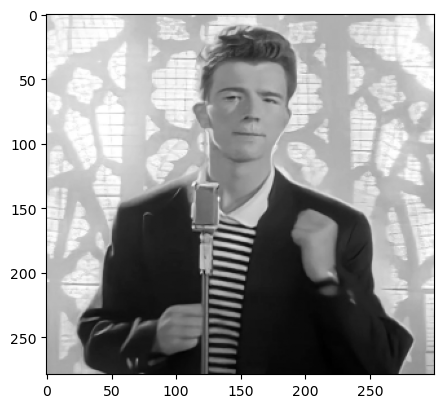

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

### Draw Maxpooled Image

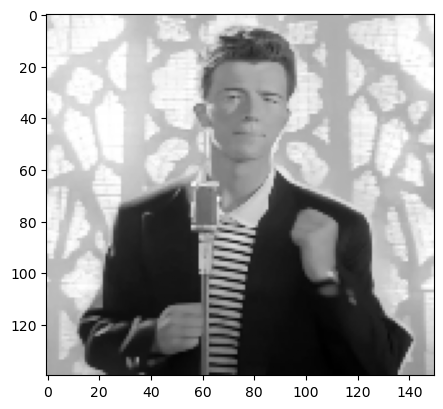

In [18]:
data_maxpool = maxpool(data)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

### Draw Maxpooled (x2) Image

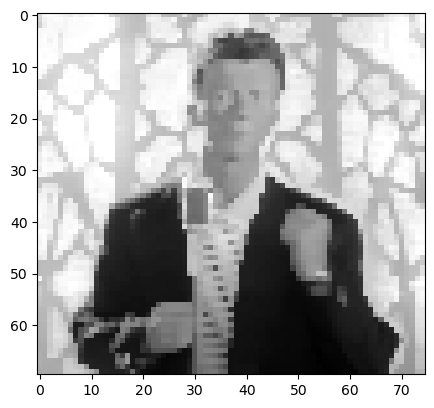

In [19]:
data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

### Draw Maxpooled (x3) Image

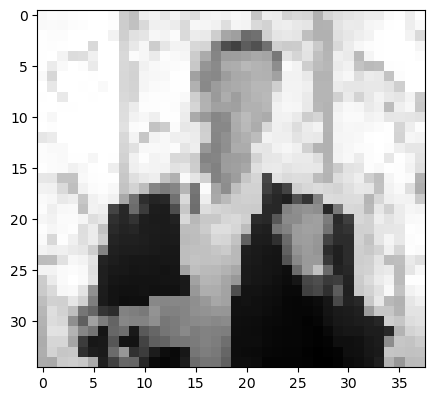

In [20]:
data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

### Define Meanpooling Function
Define the meanpooling function, which is a type of downsampling function that takes the average value of each 2 by 2 patch

In [24]:
def meanpool(x_in):
  kernel_height = 2
  kernel_width = 2
  height = int(np.ceil(x_in.shape[0]/2))
  width =  int(np.ceil(x_in.shape[1]/2))
  x_out = np.zeros((height, width))
  for h in range(height): 
    for w in range(width):
        h_start = h * kernel_height
        h_end   = min(h_start + kernel_height, x_in.shape[0])
        w_start = w * kernel_width
        w_end   = min(w_start + kernel_width, x_in.shape[1])
        patch = x_in[h_start:h_end, w_start:w_end]
        x_out[h, w] = np.mean(patch)
  return x_out

### Print Original Array (4 by 4)

In [25]:
print("Original:")
print(orig_4_4)

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


### Print Meanpooled Array (2 by 2)
Print the original array after it has undergone the meanpooling function, returning a 2 by 2 array

In [26]:
print("Meanpooled:")
print(meanpool(orig_4_4))

Meanpooled:
[[3. 4.]
 [5. 2.]]


### Draw Original Image

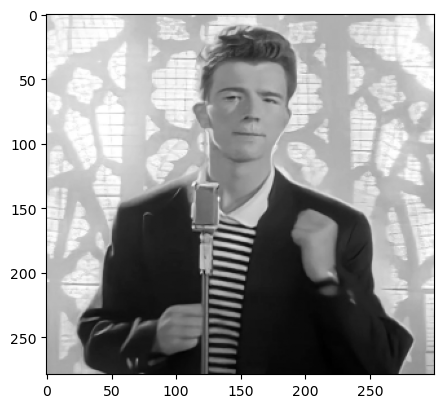

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

### Draw Meanpooled Image

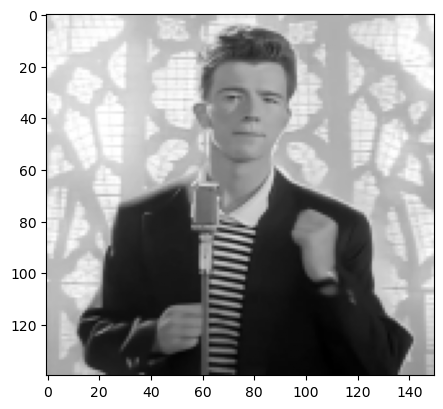

In [28]:
data_meanpool = meanpool(data)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

### Draw Meanpooled (x2) Image

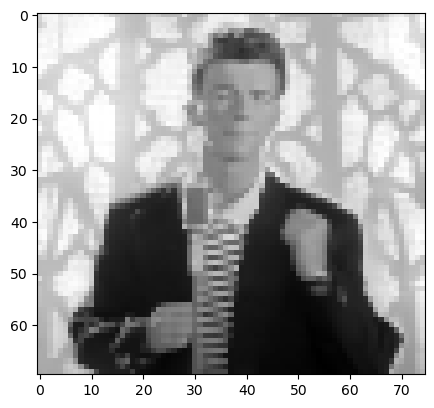

In [29]:
data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

### Draw Meanpooled (x3) Image

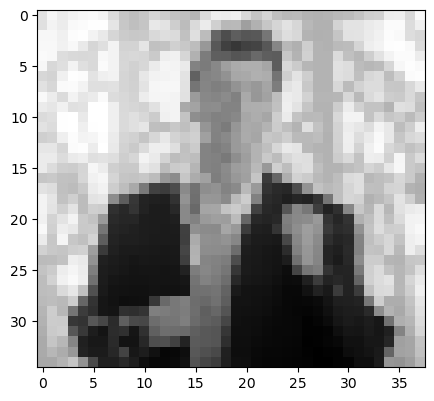

In [30]:
data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

### Define 2 by 2 Array (Upsampling)
Define a 2 by 2 array, which will be used as the input of upsampling functions

In [31]:
orig_2_2 = np.array([[6, 8], [8,4]])

### Define Duplication Function
Define the duplication function, which is a type of upsampling function that duplicates each pixel into a 2 by 2 patch

In [32]:
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  kernel_height = 2
  kernel_width = 2
  height = int(np.ceil(x_in.shape[0]))
  width =  int(np.ceil(x_in.shape[1]))
  for h in range(height): 
    for w in range(width):
        h_start = h * kernel_height
        h_end   = h_start + kernel_height
        w_start = w * kernel_width
        w_end   = w_start + kernel_width
        x_out[h_start:h_end, w_start:w_end] = x_in[h, w]

  return x_out

### Print Original Array (2 by 2)

In [33]:
print("Original:")
print(orig_2_2)

Original:
[[6 8]
 [8 4]]


### Print Duplicated Array (4 by 4)
Print the original array after it has undergone the duplicaton function, resulting in a 4 by 4 array 

In [34]:
print("Duplicated:")
print(duplicate(orig_2_2))

Duplicated:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


### Draw Original Image

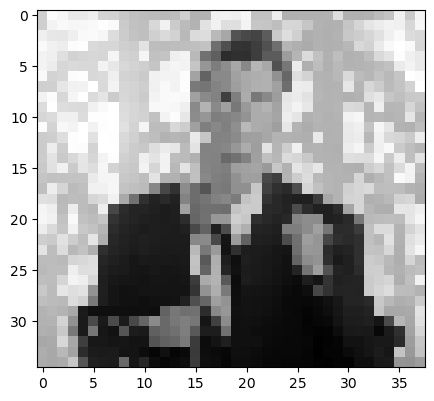

In [35]:
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

### Draw Duplicated Image

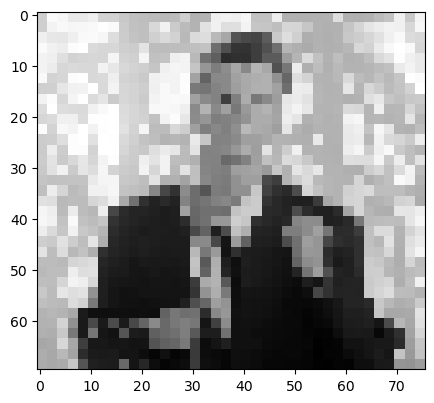

In [36]:
data_duplicate = duplicate(data_subsample3)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

### Draw Duplicated (x2) Image

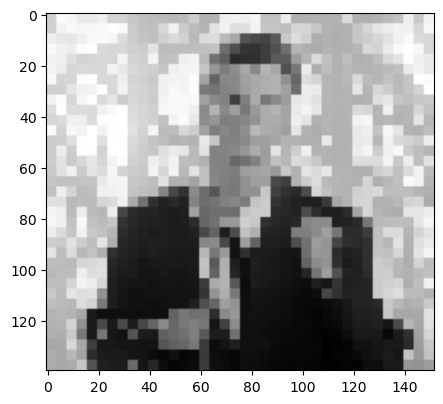

In [37]:
data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

### Draw Duplicated (x3) Image

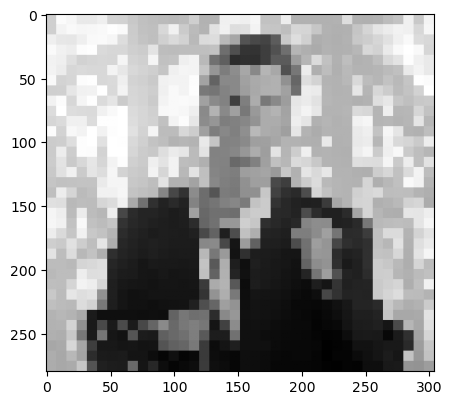

In [38]:
data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

### Define Max Unpooling Function
Define the max unpooling function, which is a type of upsampling function that takes a value from the original array and places it at the max location in each 2 by 2 patch

In [39]:
def max_unpool(x_in, x_high_res):
    kernel_height = 2
    kernel_width = 2
    height = x_in.shape[0]
    width  = x_in.shape[1]
    
    x_out = np.zeros((height*2, width*2))
    
    for h in range(height):
        for w in range(width):
            # Coordinates in high-res image
            h_start = h * kernel_height
            h_end   = min(h_start + kernel_height, x_high_res.shape[0])
            w_start = w * kernel_width
            w_end   = min(w_start + kernel_width, x_high_res.shape[1])
            
            # If the patch is empty, place a value at top-left of block
            if h_start >= h_end or w_start >= w_end:
                if h_start < x_out.shape[0] and w_start < x_out.shape[1]:
                    x_out[h_start, w_start] = x_in[h, w]
                continue

            patch = x_high_res[h_start:h_end, w_start:w_end]
            if patch.size == 0:
                # Place pooled value at top-left if patch is unexpectedly empty
                if h_start < x_out.shape[0] and w_start < x_out.shape[1]:
                    x_out[h_start, w_start] = x_in[h, w]
                continue

            # Find the index of the max in this patch
            max_idx = np.unravel_index(np.argmax(patch), patch.shape)
            
            # Place the pooled value at the max location
            out_h = h_start + max_idx[0]
            out_w = w_start + max_idx[1]
            if out_h < x_out.shape[0] and out_w < x_out.shape[1]:
                x_out[out_h, out_w] = x_in[h, w]
    
    return x_out

### Print Original Array (2 by 2)

In [40]:
print("Original:")
print(orig_2_2)

Original:
[[6 8]
 [8 4]]


### Print Max Unpooled Array (4 by 4)
Print the original array after it has undergone the max unpooling function, which returns a 4 by 4 array

In [41]:
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Max unpooled:
[[0. 0. 0. 0.]
 [6. 0. 0. 8.]
 [0. 0. 0. 4.]
 [0. 8. 0. 0.]]


### Draw Original Image

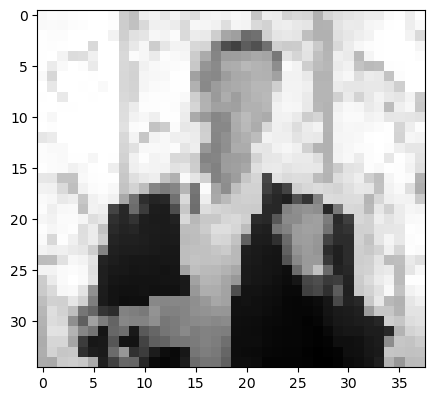

In [42]:
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

### Draw Max Unpooled Image

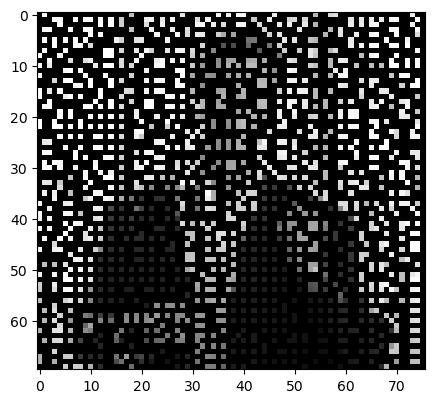

In [43]:
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

### Draw Max Unpooled (x2) Image

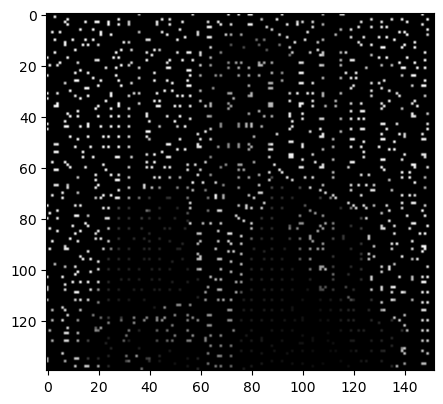

In [44]:
data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

### Draw Max Unpooled (x3) Image

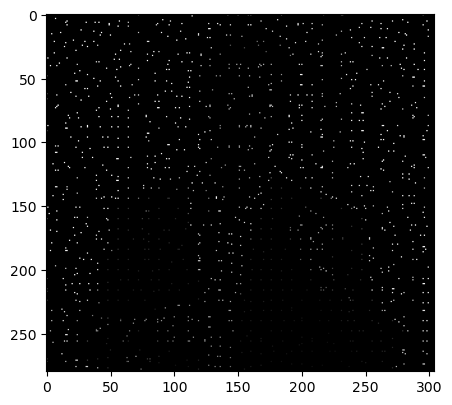

In [45]:
data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

### Define Bilinear Upsampling Function
Define the bilinear upsampling function, which is a type of upsampling function that uses bilinear interpolation to upsample an array

In [46]:
def bilinear(x_in):
  H, W = x_in.shape
  H_out, W_out = H * 2, W * 2
  x_out = np.zeros((H_out, W_out), dtype=float)
  for i in range(H_out):
    for j in range(W_out):
      x = i / 2.0
      y = j / 2.0
      x0 = int(np.floor(x)); y0 = int(np.floor(y))
      x1 = min(x0 + 1, H - 1); y1 = min(y0 + 1, W - 1)
      dx = x - x0; dy = y - y0
      if H == 1 and W == 1:
        x_out[i, j] = x_in[0, 0]
      elif H == 1:
        x_out[i, j] = (1 - dy) * x_in[0, y0] + dy * x_in[0, y1]
      elif W == 1:
        x_out[i, j] = (1 - dx) * x_in[x0, 0] + dx * x_in[x1, 0]
      else:
        x_out[i, j] = ((1 - dx) * (1 - dy) * x_in[x0, y0] +
                 dx * (1 - dy) * x_in[x1, y0] +
                 (1 - dx) * dy * x_in[x0, y1] +
                 dx * dy * x_in[x1, y1])
  return x_out.astype(x_in.dtype)  

### Print Original Array (2 by 2)

In [47]:
print("Original:")
print(orig_2_2)

Original:
[[6 8]
 [8 4]]


### Print Bilinearly Upsampled Array (4 by 4)
Print the original array after it has undergone the bilinear upsampling function, returning a 4 by 4 array

In [48]:
print("Bilinear:")
print(bilinear(orig_2_2))

Bilinear:
[[6 7 8 8]
 [7 6 6 6]
 [8 6 4 4]
 [8 6 4 4]]


### Draw Original Image

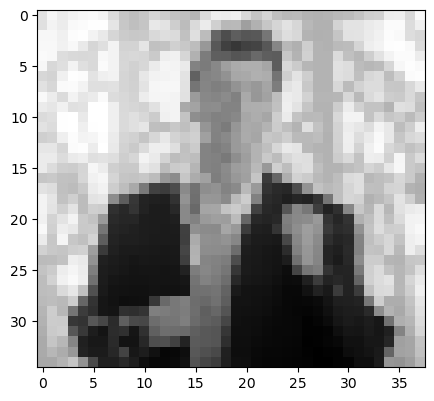

In [49]:
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

### Draw Bilinearly Upsampled Image

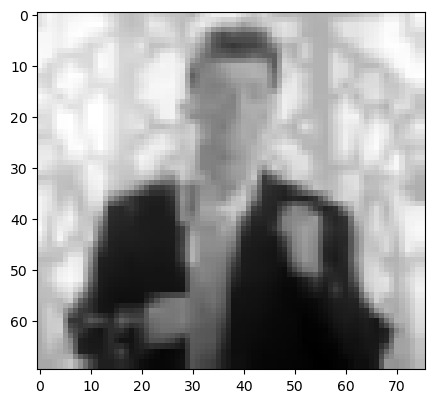

In [50]:
data_bilinear = bilinear(data_meanpool3)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

### Draw Bilinearly Upsampled (x2) Image

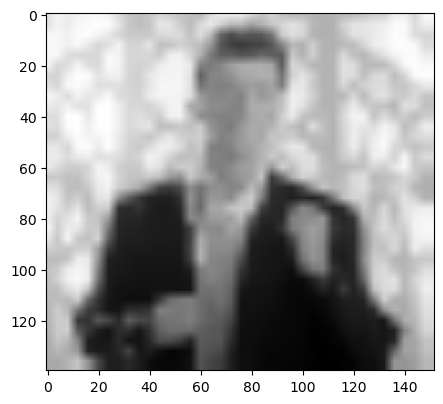

In [51]:
data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

### Draw Bilinearly Upsampled (x3) Image

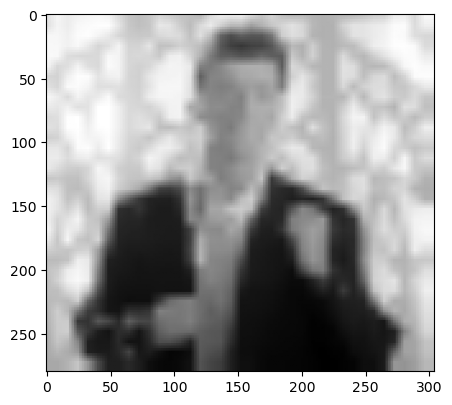

In [52]:
data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()